In [44]:
import pandas as pd
cust_df = pd.read_csv('data/002_customers.csv')

In [45]:
cust_df.head()

cust_id        age  credit_score email  distance_to_store  online_visits  \
0        0  46.719825    735.837331   yes           9.186310              0   
1        1  39.283359    656.599440   yes           0.781894             46   
2        2  33.574168    665.934422   yes           1.204119             64   
3        3  43.564256    718.456166   yes           9.736359             29   
4        4  31.358552    626.323897   yes          33.782715              0   

   online_trans  online_spend  store_trans  store_spend  sat_service  \
0             0      0.000000            1    33.603505          NaN   
1            18    352.735573            0     0.000000          2.0   
2            21    355.833505            6   162.685187          4.0   
3            11    186.594784            1    51.327653          2.0   
4             0      0.000000            0     0.000000          NaN   

   sat_selection  
0            NaN  
1            2.0  
2            4.0  
3            3.0  
4            NaN

<AxesSubplot:>

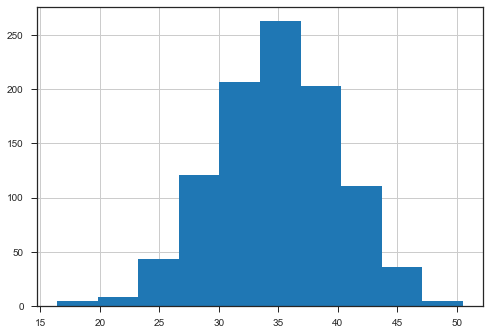

In [46]:
cust_df.age.hist()

In [47]:
cust_df.age.min()

16.41393181643162

In [48]:
cust_df.dtypes

cust_id                int64
age                  float64
credit_score         float64
email                 object
distance_to_store    float64
online_visits          int64
online_trans           int64
online_spend         float64
store_trans            int64
store_spend          float64
sat_service          float64
sat_selection        float64
dtype: object

<AxesSubplot:xlabel='age', ylabel='credit_score'>

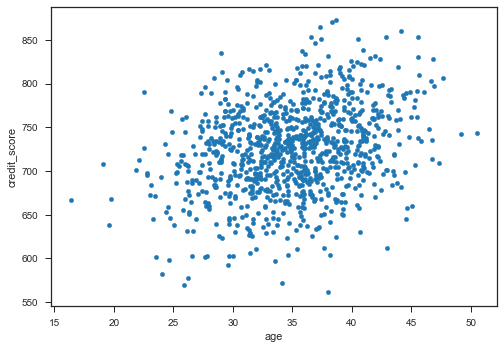

In [49]:
cust_df.plot(kind='scatter', x='age', y='credit_score')

<AxesSubplot:xlabel='age', ylabel='credit_score'>

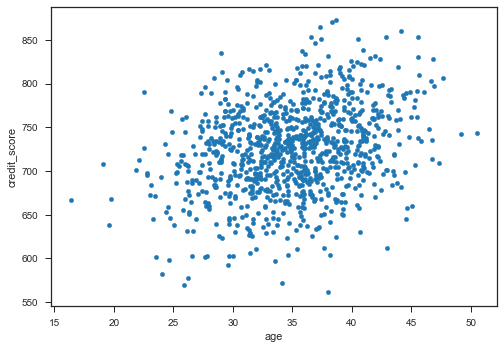

In [50]:
import matplotlib.pyplot as plt


plt.style.use('seaborn-notebook')
plt.style.use('seaborn-white')
plt.style.use('seaborn-ticks')

cust_df.plot(kind='scatter', x='age', y='credit_score')

Text(0, 0.5, 'Customer credit score')

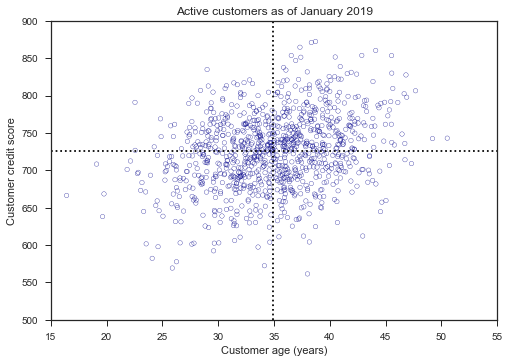

In [51]:
cust_df.plot(kind='scatter',
             x='age',
             y='credit_score',
             c='none',
             edgecolor='darkblue',
             xlim=[15, 55],
             ylim=[500, 900])
plt.plot([15, 55], [cust_df.credit_score.mean(),
                    cust_df.credit_score.mean()], 'k:')
plt.plot([cust_df.age.mean(), cust_df.age.mean()],
         [500, 900], 
         'k:')
plt.title('Active customers as of January 2019')
plt.xlabel('Customer age (years)')
plt.ylabel('Customer credit score')

Text(0, 0.5, 'Prior 12 months online sales ($)')

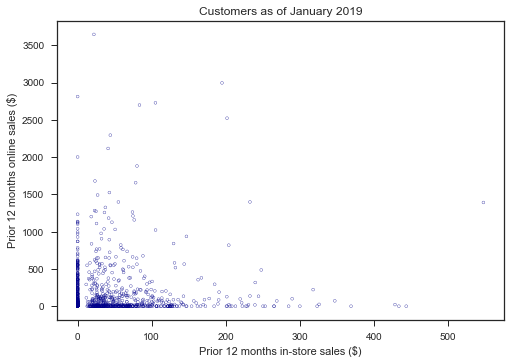

In [52]:
cust_df.plot(kind='scatter',
             x='store_spend',
             y='online_spend',
             c='none',
             edgecolor='darkblue',
             s=8)
plt.title('Customers as of January 2019')
plt.xlabel('Prior 12 months in-store sales ($)')
plt.ylabel('Prior 12 months online sales ($)')

Text(0, 0.5, 'Count of customers')

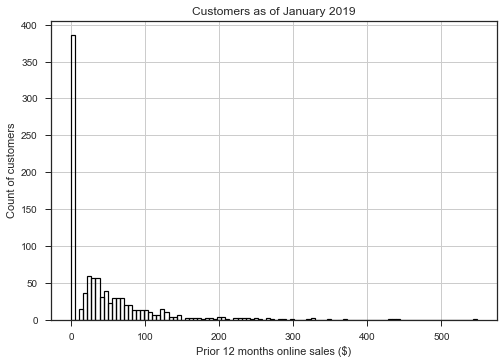

In [53]:
cust_df.store_spend.hist(bins=100,
                         edgecolor='k',
                         facecolor='none',
                         linewidth=1.2)
plt.title('Customers as of January 2019')
plt.xlabel('Prior 12 months online sales ($)')
plt.ylabel('Count of customers')

### 4.2.2 Color-coding points on a scatterplot

Text(0, 0.5, 'Prior 12 months online sales ($)')

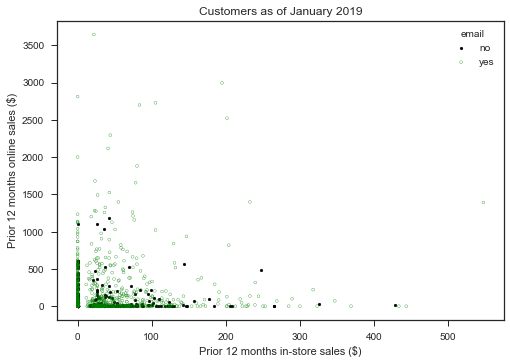

In [54]:
edge_mapper = {'yes': 'g',
                'no': 'k'}
fill_mapper = {'yes': 'none',
               'no': 'k' }

fig, ax = plt.subplots()
for name, group in cust_df.groupby('email'):
  ax.scatter(x=group.store_spend,
             y=group.online_spend,
             edgecolor=edge_mapper[name],
             c=fill_mapper[name],
             s=8,
             label=name)
plt.legend(title='email')
plt.title('Customers as of January 2019')
plt.xlabel('Prior 12 months in-store sales ($)')
plt.ylabel('Prior 12 months online sales ($)')

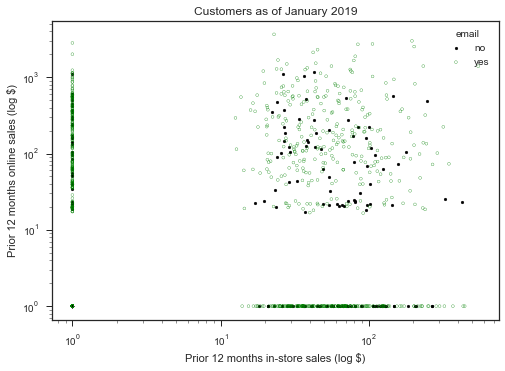

In [55]:
fig, ax = plt.subplots()
for name, group in cust_df.groupby('email'):
  ax.scatter(x=group.store_spend+1,
             y=group.online_spend+1,
             edgecolor=edge_mapper[name],
             c=fill_mapper[name],
             s=8,
             label=name)
plt.legend(title='email')
plt.title('Customers as of January 2019')
plt.xlabel('Prior 12 months in-store sales (log $)')
plt.ylabel('Prior 12 months online sales (log $)')
plt.xscale('log')
plt.yscale('log')

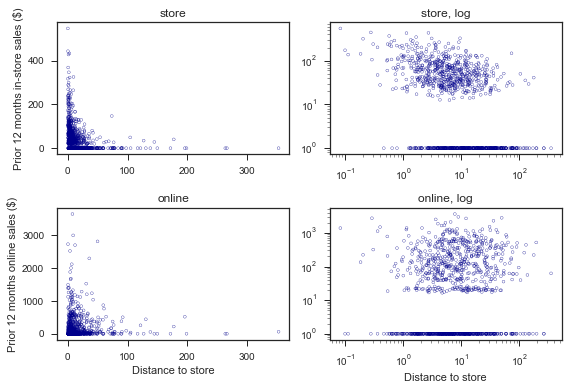

In [56]:
plt.subplot(221)
plt.scatter(x=cust_df.distance_to_store,
            y=cust_df.store_spend,
            c='none',
            edgecolor='darkblue',
            s=8)
plt.title('store')
plt.ylabel('Prior 12 months in-store sales ($)')

plt.subplot(223)
plt.scatter(x=cust_df.distance_to_store,
            y=cust_df.online_spend,
            c='none',
            edgecolor='darkblue',
            s=8)
plt.title('online')
plt.xlabel('Distance to store')
plt.ylabel('Prior 12 months online sales ($)')

plt.subplot(222)
plt.scatter(x=cust_df.distance_to_store,
            y=cust_df.store_spend+1,
            c='none',
            edgecolor='darkblue',
            s=8)
plt.title('store, log')
plt.xscale('log')
plt.yscale('log')

plt.subplot(224)
plt.scatter(x=cust_df.distance_to_store,
            y=cust_df.online_spend+1,
            c='none',
            edgecolor='darkblue',
            s=8)
plt.title('online, log')
plt.xlabel('Distance to store')
plt.xscale('log')
plt.yscale('log')

plt.tight_layout()

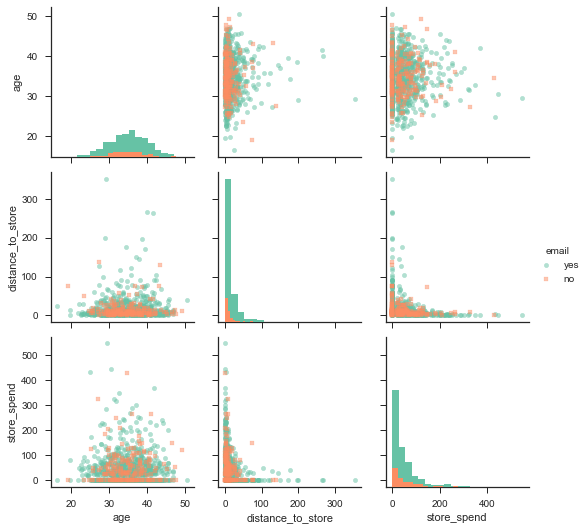

In [57]:
import seaborn as sns

g = sns.PairGrid(cust_df[['age', 'distance_to_store',
                          'store_spend', 'email']],
                 height=2.5,
                 hue='email', palette='Set2',
                 hue_kws={"marker": ['o', 's']})
_ = g.map_offdiag(plt.scatter, s=20, alpha=0.5)
_ = g.map_diag(plt.hist, bins=20)
_ = g.add_legend()

### Correlation matrices

In [58]:
cust_df.corr()

cust_id       age  credit_score  distance_to_store  \
cust_id            1.000000  0.016605     -0.017527           0.032520   
age                0.016605  1.000000      0.293173           0.018909   
credit_score      -0.017527  0.293173      1.000000           0.053541   
distance_to_store  0.032520  0.018909      0.053541           1.000000   
online_visits      0.004980 -0.050954     -0.015363          -0.008321   
online_trans      -0.001345 -0.050772     -0.013135          -0.008004   
online_spend      -0.003537 -0.050662     -0.008845          -0.010778   
store_trans        0.003211 -0.045477     -0.041787          -0.247095   
store_spend        0.018016 -0.024672     -0.024324          -0.229249   
sat_service        0.015505 -0.026356     -0.018062           0.011372   
sat_selection      0.038622 -0.063342     -0.013233          -0.002108   

                   online_visits  online_trans  online_spend  store_trans  \
cust_id                 0.004980     -0.001345     -0.003537     0.003211   
age                    -0.050954     -0.050772     -0.050662    -0.045477   
credit_score           -0.015363     -0.013135     -0.008845    -0.041787   
distance_to_store      -0.008321     -0.008004     -0.010778    -0.247095   
online_visits           1.000000      0.992050      0.985861     0.058719   
online_trans            0.992050      1.000000      0.994954     0.058749   
online_spend            0.985861      0.994954      1.000000     0.060693   
store_trans             0.058719      0.058749      0.060693     1.000000   
store_spend             0.024198      0.025554      0.026421     0.896367   
sat_service            -0.055680     -0.049443     -0.051517     0.000464   
sat_selection           0.043876      0.056386      0.056939     0.065107   

                   store_spend  sat_service  sat_selection  
cust_id               0.018016     0.015505       0.038622  
age                  -0.024672    -0.026356      -0.063342  
credit_score         -0.024324    -0.018062      -0.013233  
distance_to_store    -0.229249     0.011372      -0.002108  
online_visits         0.024198    -0.055680       0.043876  
online_trans          0.025554    -0.049443       0.056386  
online_spend          0.026421    -0.051517       0.056939  
store_trans           0.896367     0.000464       0.065107  
store_spend           1.000000    -0.013511       0.059270  
sat_service          -0.013511     1.000000       0.535021  
sat_selection         0.059270     0.535021       1.000000

<AxesSubplot:>

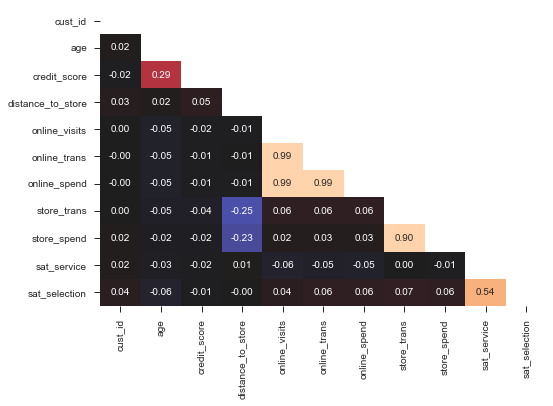

In [59]:
sns.heatmap(cust_df.corr(),
            vmin=-0.3,
            vmax=0.6,
            center=0,
            annot=True,
            fmt='.2f',
            mask=~np.tri(cust_df.corr().shape[1], k=-1, dtype=bool),
            cbar=False)

### Transforming variables before computing correlations.

Text(0.5, 0, 'Distance to store')

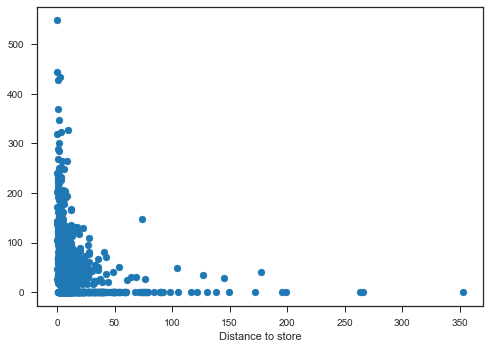

In [60]:
plt.scatter(cust_df.distance_to_store, cust_df.store_spend)
plt.xlabel('Distance to store')

Text(0.5, 0, '1/sqrt(distance_to_store)')

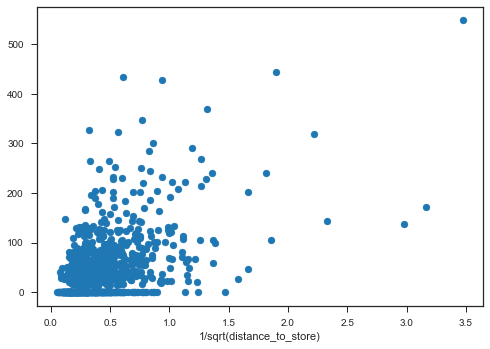

In [61]:
plt.scatter(1/np.sqrt(cust_df.distance_to_store), cust_df.store_spend)
plt.xlabel('1/sqrt(distance_to_store)')

## Exploring associations in survey responses.

Text(0, 0.5, 'Customer satisfaction with selection')

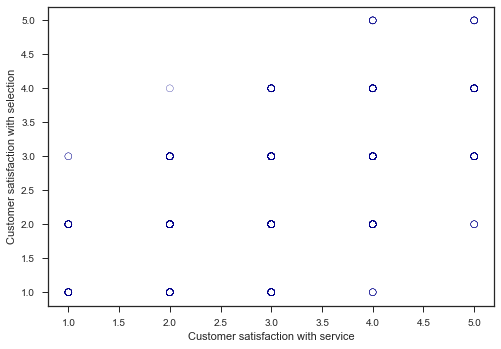

In [62]:
plt.scatter(x=cust_df.sat_service,
            y=cust_df.sat_selection,
            c='none',
            edgecolor='darkblue')
plt.xlabel('Customer satisfaction with service')
plt.ylabel('Customer satisfaction with selection')